<a href="https://colab.research.google.com/github/singhsourav0/Newyork_Taxi_Data/blob/main/K-Means_T-Sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

##Loading the ZIP data from Kaggle

In [2]:
!kaggle datasets download -d microize/newyork-yellow-taxi-trip-data-2020-2019

Dataset URL: https://www.kaggle.com/datasets/microize/newyork-yellow-taxi-trip-data-2020-2019
License(s): ODbL-1.0
 99% 1.79G/1.81G [00:20<00:00, 114MB/s]
100% 1.81G/1.81G [00:20<00:00, 95.7MB/s]


In [4]:
!unzip taxi.zip

Archive:  taxi.zip
  inflating: taxi+_zone_lookup.csv   
  inflating: taxi_zones/taxi_zones.dbf  
  inflating: taxi_zones/taxi_zones.prj  
  inflating: taxi_zones/taxi_zones.sbn  
  inflating: taxi_zones/taxi_zones.sbx  
  inflating: taxi_zones/taxi_zones.shp  
  inflating: taxi_zones/taxi_zones.shp.xml  
  inflating: taxi_zones/taxi_zones.shx  
  inflating: yellow_tripdata_2019-01.csv  
  inflating: yellow_tripdata_2019-02.csv  
  inflating: yellow_tripdata_2019-03.csv  
  inflating: yellow_tripdata_2019-04.csv  
  inflating: yellow_tripdata_2019-05.csv  
  inflating: yellow_tripdata_2019-06.csv  
  inflating: yellow_tripdata_2019-07.csv  
  inflating: yellow_tripdata_2019-08.csv  
  inflating: yellow_tripdata_2019-09.csv  
  inflating: yellow_tripdata_2019-10.csv  
  inflating: yellow_tripdata_2019-11.csv  
  inflating: yellow_tripdata_2019-12.csv  
  inflating: yellow_tripdata_2020-01.csv  
  inflating: yellow_tripdata_2020-02.csv  
  inflating: yellow_tripdata_2020-03.csv  
  infla

#Select one file for analysis

In [6]:
import pandas as pd
data1 = pd.read_csv('/content/yellow_tripdata_2020-06.csv')
data1.info()

<ipython-input-6-bb73ea27aae5>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/content/yellow_tripdata_2020-06.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549760 entries, 0 to 549759
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               499043 non-null  float64
 1   tpep_pickup_datetime   549760 non-null  object 
 2   tpep_dropoff_datetime  549760 non-null  object 
 3   passenger_count        499043 non-null  float64
 4   trip_distance          549760 non-null  float64
 5   RatecodeID             499043 non-null  float64
 6   store_and_fwd_flag     499043 non-null  object 
 7   PULocationID           549760 non-null  int64  
 8   DOLocationID           549760 non-null  int64  
 9   payment_type           499043 non-null  float64
 10  fare_amount            549760 non-null  float64
 11  extra                  549760 non-null  float64
 12  mta_tax                549760 non-null  float64
 13  tip_amount             549760 non-null  float64
 14  tolls_amount           549760 non-nu

In [32]:
data = data1
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.60,1.0,N,140,68,1.0,15.50,3.0,0.5,4.00,0.00,0.3,23.30,2.5
1,1.0,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.60,1.0,N,79,226,1.0,19.50,3.0,0.5,2.00,0.00,0.3,25.30,2.5
2,1.0,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.30,1.0,N,238,116,2.0,10.00,0.5,0.5,0.00,0.00,0.3,11.30,0.0
3,1.0,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.30,1.0,N,141,116,2.0,17.50,3.0,0.5,0.00,0.00,0.3,21.30,2.5
4,1.0,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.40,1.0,N,186,75,1.0,14.50,3.0,0.5,3.65,0.00,0.3,21.95,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549755,2.0,2020-06-30 23:05:00,2020-06-30 23:32:00,1.0,12.96,1.0,NaN,17,69,NaN,32.91,0.0,0.5,2.75,6.12,0.3,42.58,0.0
549756,2.0,2020-06-30 23:21:47,2020-06-30 23:25:24,1.0,0.36,1.0,NaN,41,41,NaN,11.45,0.0,0.5,2.75,0.00,0.3,15.00,0.0
549757,2.0,2020-06-30 23:34:00,2020-06-30 23:44:00,1.0,2.36,1.0,NaN,242,81,NaN,18.45,0.0,0.5,2.75,0.00,0.3,22.00,0.0
549758,2.0,2020-06-30 23:22:47,2020-06-30 23:42:01,1.0,5.50,1.0,NaN,14,118,NaN,15.90,0.0,0.5,6.23,12.24,0.3,35.17,0.0


In [33]:
data1.shape

(549760, 18)

In [34]:
data1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

<h4><font color="teal">Since the tpep_pickup_datetime and tpep_dropoff_datetime columns have object datatype, we need to change it to datetime</br>
</font></h4>

In [35]:
# convert timestamp columns to datetime
data['tpep_pickup_datetime']= pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']= pd.to_datetime(data['tpep_dropoff_datetime'])

In [36]:
# extract features from timestamp columns (hour, day, month)
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['dropoff_day'] = data['tpep_dropoff_datetime'].dt.day
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month

In [37]:
# drop temporary columns
data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1, inplace=True)

In [38]:
data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,1.0,1.0,3.60,1.0,N,140,68,1.0,15.50,3.0,...,0.00,0.3,23.30,2.5,0,1,6,0,1,6
1,1.0,1.0,5.60,1.0,N,79,226,1.0,19.50,3.0,...,0.00,0.3,25.30,2.5,0,1,6,1,1,6
2,1.0,1.0,2.30,1.0,N,238,116,2.0,10.00,0.5,...,0.00,0.3,11.30,0.0,0,1,6,0,1,6
3,1.0,1.0,5.30,1.0,N,141,116,2.0,17.50,3.0,...,0.00,0.3,21.30,2.5,0,1,6,1,1,6
4,1.0,1.0,4.40,1.0,N,186,75,1.0,14.50,3.0,...,0.00,0.3,21.95,2.5,0,1,6,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549755,2.0,1.0,12.96,1.0,NaN,17,69,NaN,32.91,0.0,...,6.12,0.3,42.58,0.0,23,30,6,23,30,6
549756,2.0,1.0,0.36,1.0,NaN,41,41,NaN,11.45,0.0,...,0.00,0.3,15.00,0.0,23,30,6,23,30,6
549757,2.0,1.0,2.36,1.0,NaN,242,81,NaN,18.45,0.0,...,0.00,0.3,22.00,0.0,23,30,6,23,30,6
549758,2.0,1.0,5.50,1.0,NaN,14,118,NaN,15.90,0.0,...,12.24,0.3,35.17,0.0,23,30,6,23,30,6


In [39]:
data.isna().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,50717
PULocationID,0
DOLocationID,0
payment_type,50717
fare_amount,0
extra,0


#**From we can see lot of data have null values**

In [40]:
data['VendorID'] = data['VendorID'].astype('category')


In [41]:
# Mode imputation for categorical feature
data['VendorID'] = data['VendorID'].fillna(data['VendorID'].mode()[0],)
data.isna().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,50717
PULocationID,0
DOLocationID,0
payment_type,50717
fare_amount,0
extra,0


In [42]:
# Mean imputation for numerical feature
data['passenger_count'] = data['passenger_count'].fillna(int(data['passenger_count'].mean()))
data.isna().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,50717
PULocationID,0
DOLocationID,0
payment_type,50717
fare_amount,0
extra,0


In [43]:
# Mode imputation for categorical feature
data['RatecodeID'] = data['RatecodeID'].fillna(data['RatecodeID'].mode()[0],)
data.isna().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,50717
PULocationID,0
DOLocationID,0
payment_type,50717
fare_amount,0
extra,0


In [44]:
# Distribution of Store_and_fwd_flag
print(data['store_and_fwd_flag'].value_counts())


store_and_fwd_flag
N    495281
Y      3762
Name: count, dtype: int64


In [45]:
# Drop columns by name
data = data.drop(columns=['store_and_fwd_flag'])


In [46]:
# Drop columns with more than 50% missing values
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

In [47]:
data.shape

(549760, 21)

In [48]:
# Drop columns with fewer than 2 unique values
data = data.loc[:, data.nunique() > 1]


In [49]:
data.sample(10)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
356096,2.0,1.0,1.20,1.0,107,233,1.0,5.50,0.0,0.5,...,0.0,0.3,13.80,2.5,9,24,6,9,24,6
427927,1.0,0.0,2.40,1.0,162,163,1.0,11.50,2.5,0.5,...,0.0,0.3,16.28,2.5,12,27,6,13,27,6
389506,2.0,1.0,0.82,1.0,74,74,2.0,7.00,0.0,0.5,...,0.0,0.3,7.80,0.0,15,25,6,15,25,6
541233,2.0,1.0,0.82,1.0,38,38,NaN,18.08,0.0,0.5,...,0.0,0.3,21.63,0.0,9,26,6,9,26,6
76218,1.0,0.0,5.70,1.0,48,255,1.0,19.00,2.5,0.5,...,0.0,0.3,25.30,2.5,18,6,6,18,6,6
132569,1.0,1.0,9.20,1.0,186,243,1.0,28.50,3.5,0.5,...,0.0,0.3,37.80,2.5,18,10,6,18,10,6
457718,2.0,1.0,13.49,1.0,238,81,2.0,39.50,0.0,0.5,...,0.0,0.3,42.80,2.5,10,29,6,10,29,6
135211,2.0,1.0,1.76,1.0,193,226,2.0,8.00,0.5,0.5,...,0.0,0.3,9.30,0.0,3,11,6,3,11,6
192048,2.0,1.0,3.43,1.0,262,233,1.0,12.00,0.0,0.5,...,0.0,0.3,16.30,2.5,6,15,6,6,15,6
242886,2.0,1.0,0.79,1.0,236,237,2.0,5.00,0.5,0.5,...,0.0,0.3,8.80,2.5,20,17,6,20,17,6


<h1><font color="cyan">Scaling is important for Numerical columns</font></h1>

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [50]:
numerical_features = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']

In [51]:
len(numerical_features)

9

In [54]:
numerical_features = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']
data[numerical_features] = StandardScaler().fit_transform(data[numerical_features])

In [55]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,1.0,1.0,-0.001501,1.0,140,68,1.0,0.140020,1.563698,0.107652,...,-0.209515,0.072879,0.298511,0.509498,0,1,6,0,1,6
1,1.0,1.0,0.004451,1.0,79,226,1.0,0.435849,1.563698,0.107652,...,-0.209515,0.072879,0.430273,0.509498,0,1,6,1,1,6
2,1.0,1.0,-0.005369,1.0,238,116,2.0,-0.266744,-0.414437,0.107652,...,-0.209515,0.072879,-0.492057,-1.883325,0,1,6,0,1,6
3,1.0,1.0,0.003558,1.0,141,116,2.0,0.287935,1.563698,0.107652,...,-0.209515,0.072879,0.166750,0.509498,0,1,6,1,1,6
4,1.0,1.0,0.000880,1.0,186,75,1.0,0.066063,1.563698,0.107652,...,-0.209515,0.072879,0.209572,0.509498,0,1,6,0,1,6


In [56]:
data.passenger_count.value_counts()

,count
passenger_count,
1.0,439649
2.0,57222
3.0,14333
0.0,13305
5.0,11219
6.0,9082
4.0,4947
9.0,2
8.0,1


In [57]:
# select features for clustering
features_for_clustering = ['passenger_count','trip_distance','payment_type','fare_amount','tip_amount','tolls_amount','improvement_surcharge','total_amount','pickup_hour','pickup_day','pickup_month','dropoff_hour','dropoff_day','dropoff_month']
len(features_for_clustering)

14

In [66]:
data['payment_type'] = data['payment_type'].astype('category')

In [67]:
data['payment_type'] = data['payment_type'].fillna(int(data['payment_type'].mode()[0]))

In [69]:
data.isna().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0


In [80]:
data.to_csv('preprocess_data.csv', index=False)

<h3><font color="yellow"><b>Silhouette Score, Elbow method:</b></font>

In [58]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [71]:
# deciding number of clusters upon 1 lakhs sample

X = data[features_for_clustering].sample(100000)

In [72]:
n_samples = len(X)
n_clusters_range = range(2,11)   # number of clusters range from 2 to 10

# specify the number of chunks
n_chunks = 10    # data is divided in 10 chunks
chunk_size = n_samples//n_chunks

In [73]:
# place holder for silhouette scores
silhouette_scores = []
inertia =[]

In [74]:
# Loop through different cluster numbers

for n_clusters in n_clusters_range:
    # Initialize MiniBatchKMeans
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init='auto', batch_size=10000)

    # Loop through chunks
    for i in range(n_chunks):
        # Determine start and end index for the chunk
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else n_samples

        # Extract the chunk
        chunk = X.iloc[start_idx:end_idx]


        # Partially fit the model on the chunk
        mbkmeans.partial_fit(chunk)


    # Predict clusters for all data points
    labels = mbkmeans.predict(X)

    # Inertia
    inertia.append(mbkmeans.inertia_)
    # Calculate silhouette score
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)
    print(f"Training for No of Clusters- {n_clusters} completed.")

Training for No of Clusters- 2 completed.
Training for No of Clusters- 3 completed.
Training for No of Clusters- 4 completed.
Training for No of Clusters- 5 completed.
Training for No of Clusters- 6 completed.
Training for No of Clusters- 7 completed.
Training for No of Clusters- 8 completed.
Training for No of Clusters- 9 completed.
Training for No of Clusters- 10 completed.


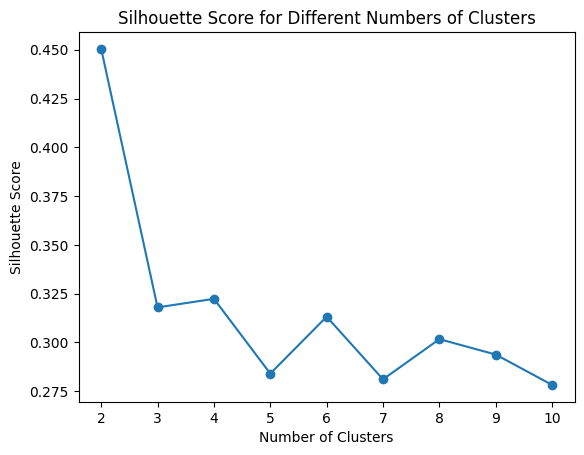

In [75]:
import matplotlib.pyplot as plt

# plot silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

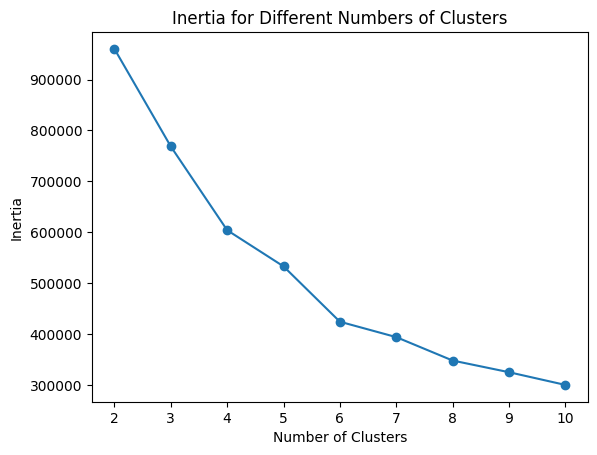

In [76]:
# plot inertia vs number of centroids
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Numbers of Clusters')
plt.show()

In [77]:
inertia

[960275.5961381672,
 768582.7038087199,
 604060.5316773476,
 532967.2205481203,
 424231.8355523649,
 393955.04605781706,
 347938.8534664131,
 325016.1477418126,
 300036.89250300336]

In [78]:
silhouette_scores

[0.4504419000359051,
 0.3179628308741461,
 0.3223435760669118,
 0.28403166337980384,
 0.31319352106013454,
 0.2810977605380825,
 0.3016806878230856,
 0.2937912556547331,
 0.27822509184463734]

<h3><font color="yellow"><b>K-means Clustering based on Elbow Score :</b></font>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


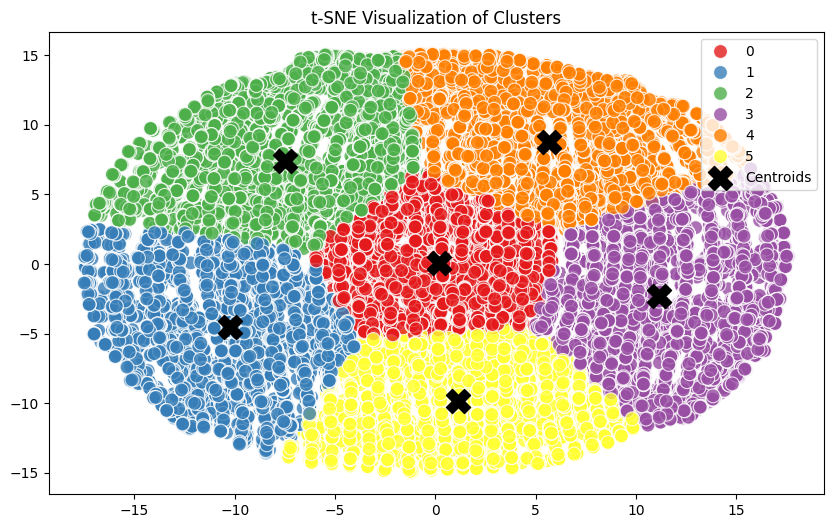

In [79]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
# Step 1: Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.8)

# Optionally, plot the centroids if you want to see where the clusters are centered
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()
